In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Загрузка данных



In [ ]:
# используем Pandas read_csv():

dataset = pd.read_csv('/content/Dresses.csv')

In [ ]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
dataset

,Dress_ID,Style,NeckLine,SleeveLength,Decoration,Pattern Type,Recommendation,mmPrice,mmRating,mmSeason,...,model,nylon,other,polyster,rayon,shiffon,silk,spandex,viscos,wool
0,1006032852,sexy,o-neck,sleeveless,ruffles,animal,1,0.00,0.92,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1212192089,casual,o-neck,petal,ruffles,animal,0,0.00,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1190380701,vintage,o-neck,full,none,print,0,0.75,0.00,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,966005983,brief,o-neck,full,embroidary,print,1,0.25,0.92,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,876339541,cute,o-neck,butterfly,bow,dot,0,0.00,0.90,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,713391965,casual,o-neck,full,none,solid,1,0.00,0.94,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
496,722565148,sexy,o-neck,full,none,none,0,0.00,0.86,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,532874347,casual,v-neck,full,lace,solid,1,0.25,0.94,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,655464934,casual,boat-neck,sleeveless,applique,print,1,0.25,0.92,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Анализ данных

In [ ]:
# размер датасета, 150 записей, 5 столбцов

dataset.shape

(500, 42)

In [ ]:
# отображаем первые 10 строк датасета

dataset.head(10)

,Dress_ID,Style,NeckLine,SleeveLength,Decoration,Pattern Type,Recommendation,mmPrice,mmRating,mmSeason,...,model,nylon,other,polyster,rayon,shiffon,silk,spandex,viscos,wool
0,1006032852,sexy,o-neck,sleeveless,ruffles,animal,1,0.00,0.92,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1212192089,casual,o-neck,petal,ruffles,animal,0,0.00,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1190380701,vintage,o-neck,full,none,print,0,0.75,0.00,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,966005983,brief,o-neck,full,embroidary,print,1,0.25,0.92,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,876339541,cute,o-neck,butterfly,bow,dot,0,0.00,0.90,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1068332458,bohemian,v-neck,sleeveless,none,print,0,0.00,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1220707172,casual,o-neck,full,none,solid,0,0.25,0.00,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1219677488,novelty,o-neck,short,lace,none,0,0.25,0.00,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1113094204,flare,v-neck,short,beading,solid,1,0.25,0.00,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,985292672,bohemian,v-neck,sleeveless,none,none,1,0.00,0.00,0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401


from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   NeckLine        500 non-null    object 
 3   SleeveLength    500 non-null    object 
 4   Decoration      500 non-null    object 
 5   Pattern Type    500 non-null    object 
 6   Recommendation  500 non-null    int64  
 7   mmPrice         500 non-null    float64
 8   mmRating        500 non-null    float64
 9   mmSeason        500 non-null    float64
 10  dropped         500 non-null    float64
 11  empire          500 non-null    float64
 12  natural         500 non-null    float64
 13  princess        500 non-null    float64
 14  free            500 non-null    float64
 15  l               500 non-null    float64
 16  m               500 non-null    float64
 17  s               500 non-null    flo

Удаление ненужных столбцов

In [ ]:
dataset.drop(columns=['Dress_ID','NeckLine','SleeveLength','Decoration','Pattern Type'], inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Recommendation  500 non-null    int64  
 2   mmPrice         500 non-null    float64
 3   mmRating        500 non-null    float64
 4   mmSeason        500 non-null    float64
 5   dropped         500 non-null    float64
 6   empire          500 non-null    float64
 7   natural         500 non-null    float64
 8   princess        500 non-null    float64
 9   free            500 non-null    float64
 10  l               500 non-null    float64
 11  m               500 non-null    float64
 12  s               500 non-null    float64
 13  small           500 non-null    float64
 14  xl              500 non-null    float64
 15  acrylic         500 non-null    float64
 16  cashmere        500 non-null    float64
 17  chiffonfabric   500 non-null    flo

In [ ]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,Recommendation,mmPrice,mmRating,mmSeason,dropped,empire,natural,princess,free,l,...,model,nylon,other,polyster,rayon,shiffon,silk,spandex,viscos,wool
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,...,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.420000,0.230500,0.705720,0.435333,0.182000,0.208000,0.608000,0.002000,0.34600,0.192000,...,0.002000,0.02000,0.004000,0.198000,0.02000,0.004000,0.054000,0.010000,0.004000,0.002000
std,0.494053,0.243646,0.401073,0.344884,0.386231,0.406283,0.488686,0.044721,0.47617,0.394268,...,0.044721,0.14014,0.063182,0.398891,0.14014,0.063182,0.226244,0.099598,0.063182,0.044721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.250000,0.920000,0.333333,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.250000,0.960000,0.666667,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataset['Style'].unique()

array(['sexy', 'casual', 'vintage', 'brief', 'cute', 'bohemian',
       'novelty', 'flare', 'party', 'work', 'ol', 'fashion'], dtype=object)

In [ ]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['Style'].value_counts()


,count
Style,
casual,232
sexy,76
party,51
cute,45
vintage,25
bohemian,24
brief,18
work,17
novelty,8


Все стили были разбиты на 3 группы:
1. Casual
2. Party Styles: sexy, party, flare
3. Brief Styles and Fashion Styles: work, brief, cute, vintage, bohemian, novelty, ol, fashion




In [ ]:
#Переименование стилей в PartyStyle
dataset.loc[dataset["Style"] == "sexy", "Style"] = "PartyStyle"
dataset.loc[dataset["Style"] == "party", "Style"] = "PartyStyle"
dataset.loc[dataset["Style"] == "flare", "Style"] = "PartyStyle"
#Переименование стилей в BriefStyle and Fashion
dataset.loc[dataset["Style"] == "work", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "brief", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "cute", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "vintage", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "bohemian", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "novelty", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "ol", "Style"] = "BriefFashionStyle"
dataset.loc[dataset["Style"] == "fashion", "Style"] = "BriefFashionStyle"

In [ ]:
dataset['Style'].value_counts()

,count
Style,
casual,232
BriefFashionStyle,139
PartyStyle,129


Видим, что набор данных несбалансированный. Максимально записей 232, минимально 129. Всего классов 3

# Код ниже к улучшениям не привел
<!-- Сократим в два раза количество casual объектов -->

В ячейках ниже я пытался сократить количество записей casual в 2 раза, но в итоге значение самой лучшей метрики было не больше 0.4

In [ ]:
# mask = dataset['Style'] == 'casual'

# dataset1 = dataset[mask]

# # invert the boolean values
# dataset2 = dataset[~mask]
# dataset2

In [ ]:
# dataset1


In [ ]:
# dataset1 = dataset1.iloc[:int(-(len(dataset1)/2))]


In [ ]:
# dataset = pd.concat([dataset1, dataset2], axis=0)


In [ ]:
# dataset = dataset.sample(frac = 1)

In [ ]:
# dataset['Style'].value_counts()

--Видим, что набор данных несбалансированный. Максимально записей 139, минимально 116. Всего классов 3

<!-- Видим, что набор данных несбалансированный. Максимально записей 139, минимально 116. Всего классов 3 -->

# Визуализация и доработка данных

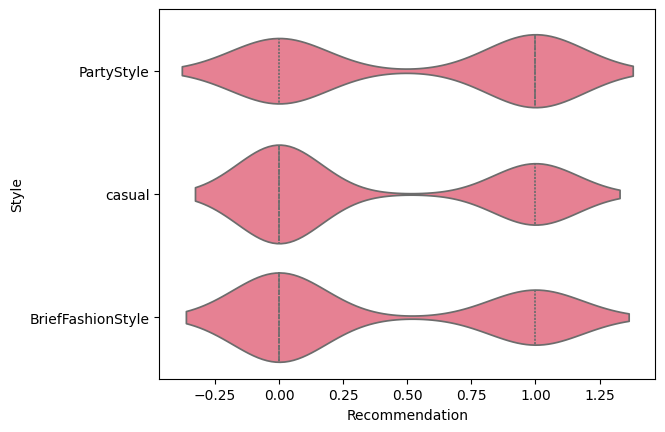

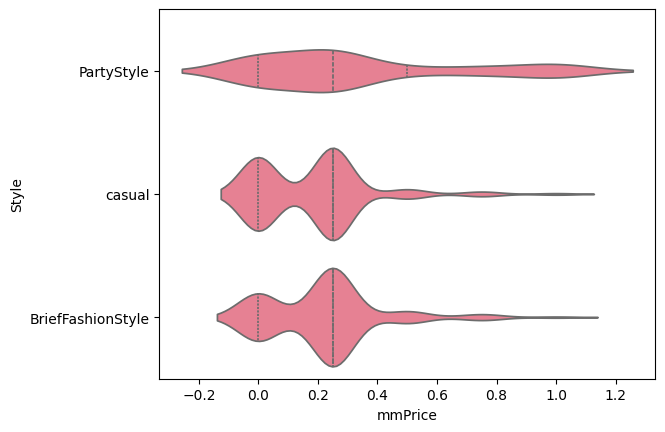

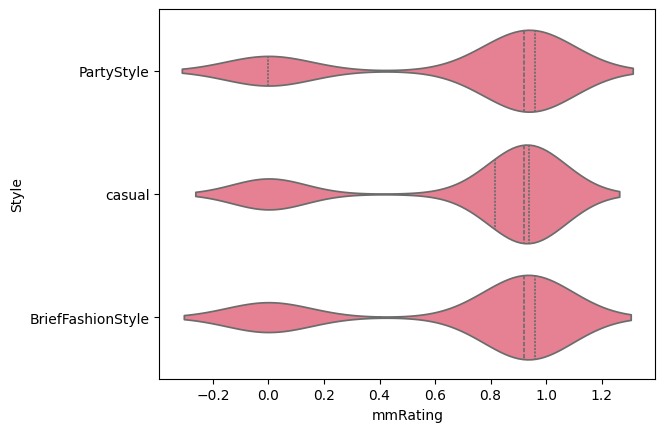

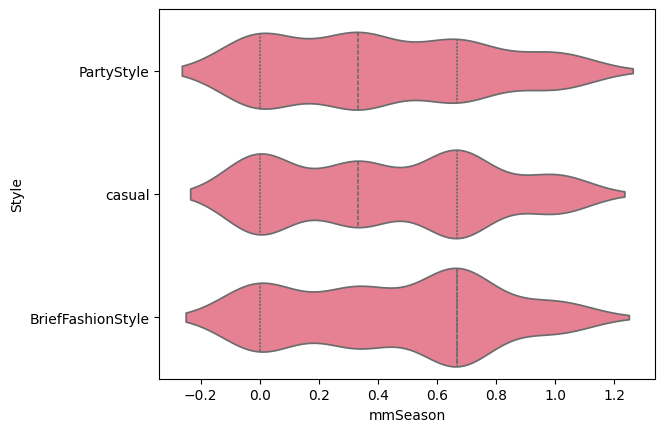

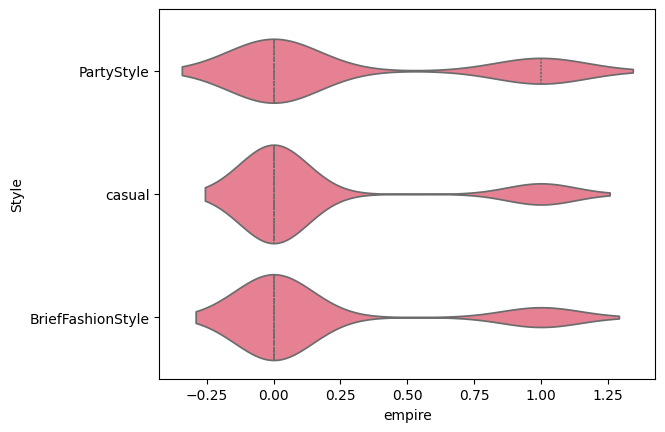

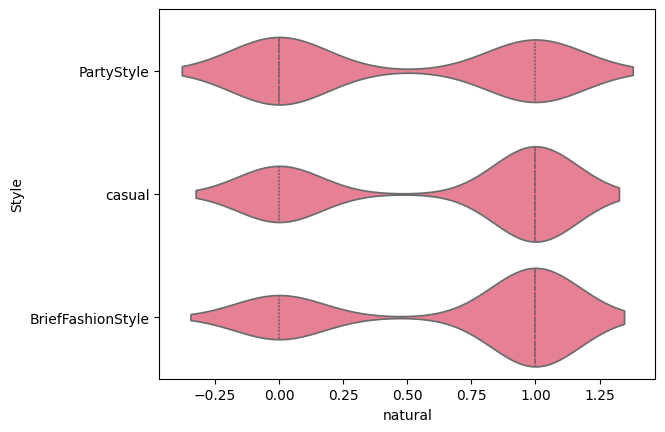

In [ ]:
# Скрипичный график.
# Используется для проверки сравнения распределения переменных:
sns.violinplot(y='Style', x='Recommendation', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Style', x='mmPrice', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Style', x='mmRating', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Style', x='mmSeason', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Style', x='empire', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Style', x='natural', data=dataset, inner='quartile')
plt.show()

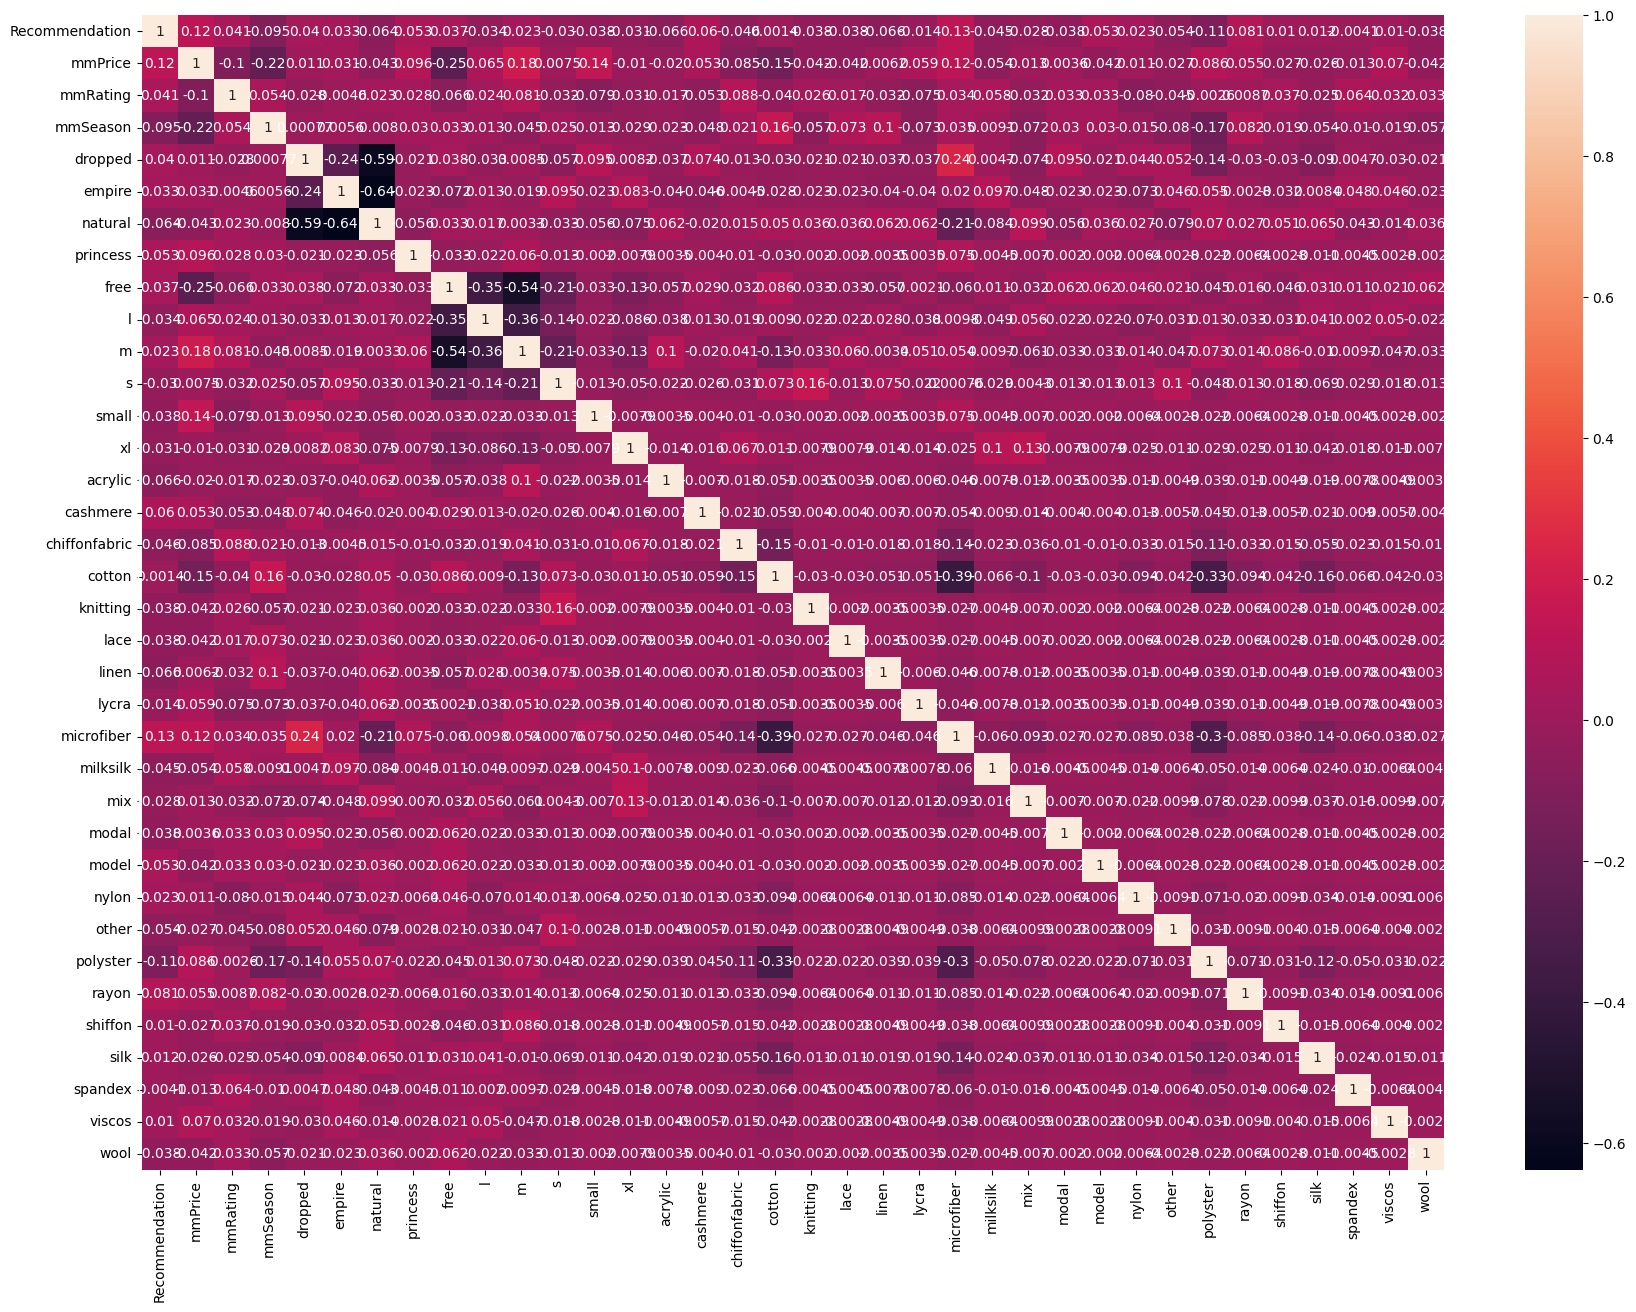

In [ ]:
# Тепловая карта
# Построение тепловой карты для проверки корреляции.
# dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(21,15))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

In [ ]:
# dataset.drop(columns=['knitting','model'], inplace=True)

In [ ]:
dataset.drop(columns=['dropped','empire','natural'], inplace=True)

In [ ]:
dataset.drop(columns=['princess','l','m','s','xl', 'small'], inplace=True)

После удаления сомнительных столбцов Тепловая карта стала выглядеть следующим образом

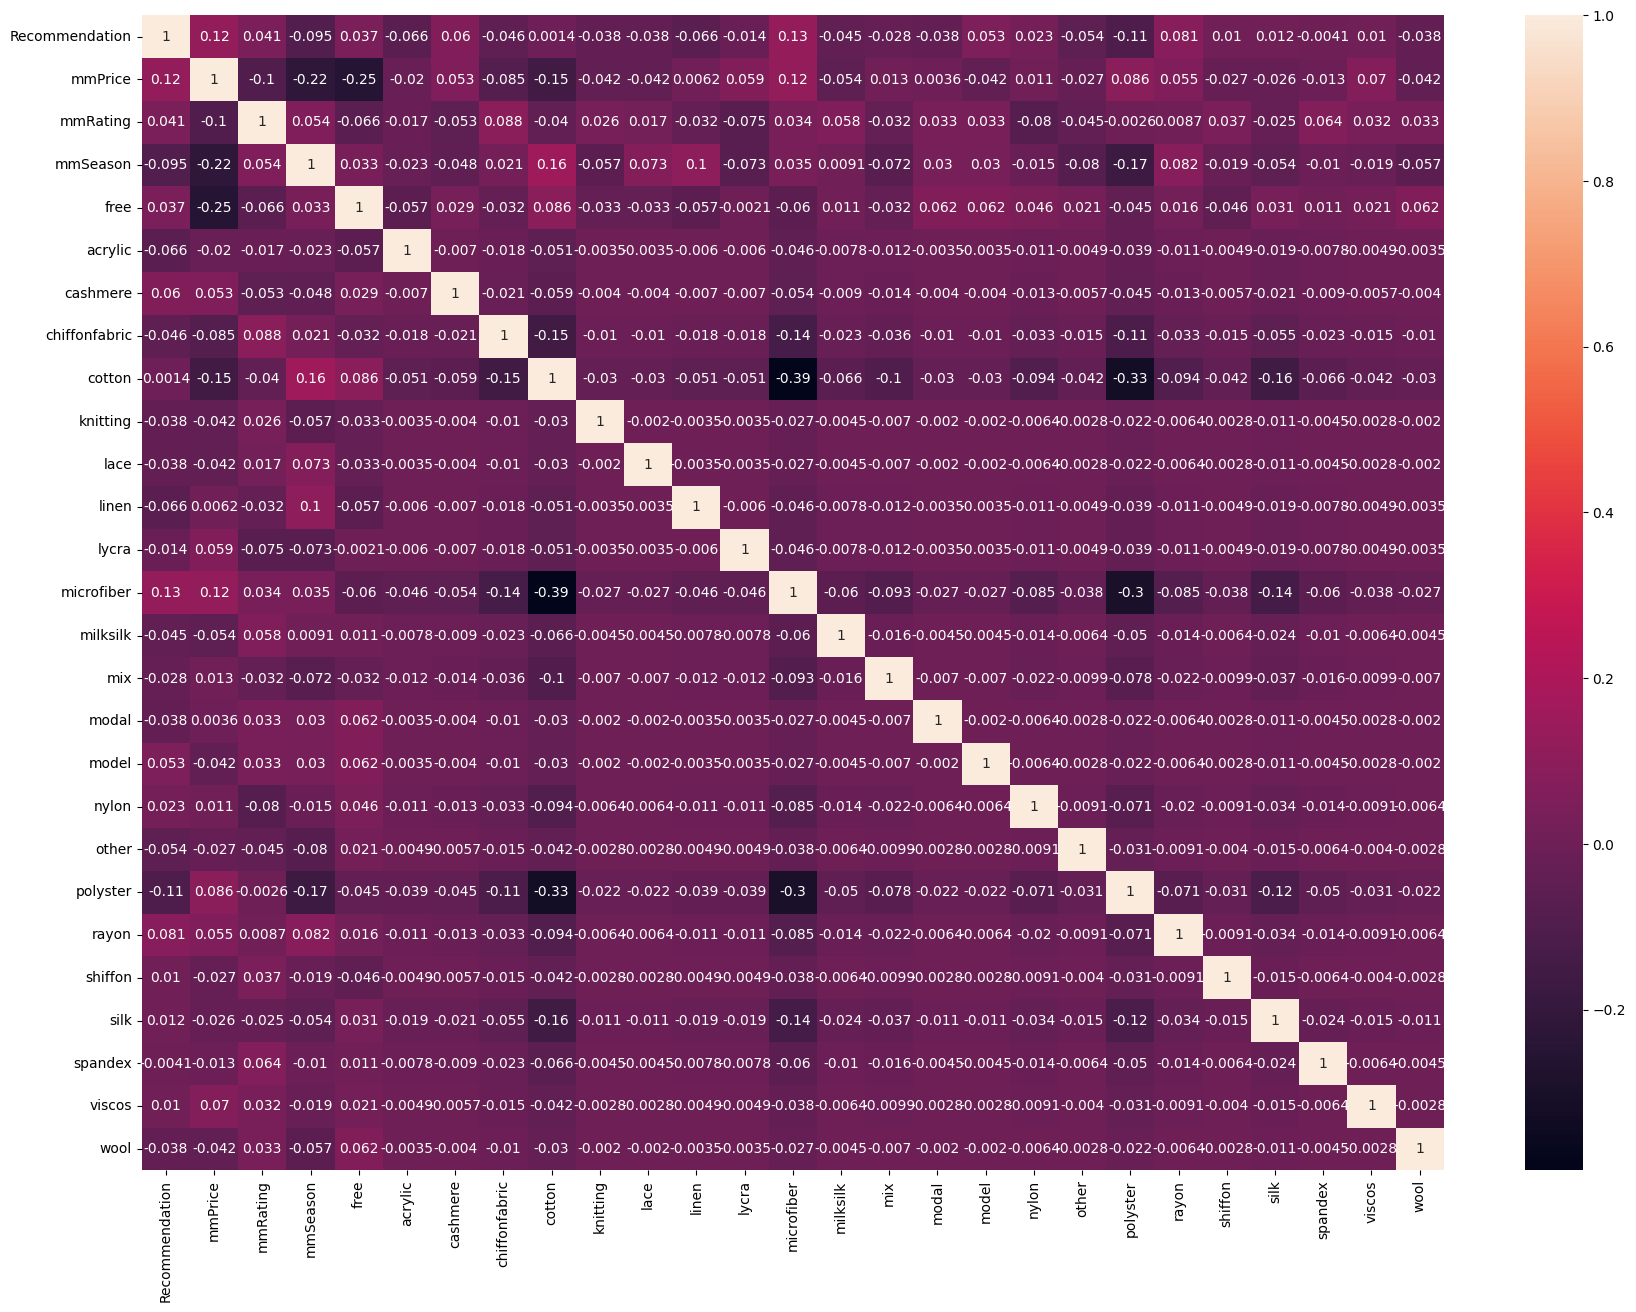

In [ ]:
# # Тепловая карта
# # Построение тепловой карты для проверки корреляции.
# # dataset.corr() используется для поиска попарной корреляции всех столбцов в кадре данных.

plt.figure(figsize=(21,15))
sns.heatmap(dataset.corr(numeric_only = True), annot=True)
plt.show()

Парный график
Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

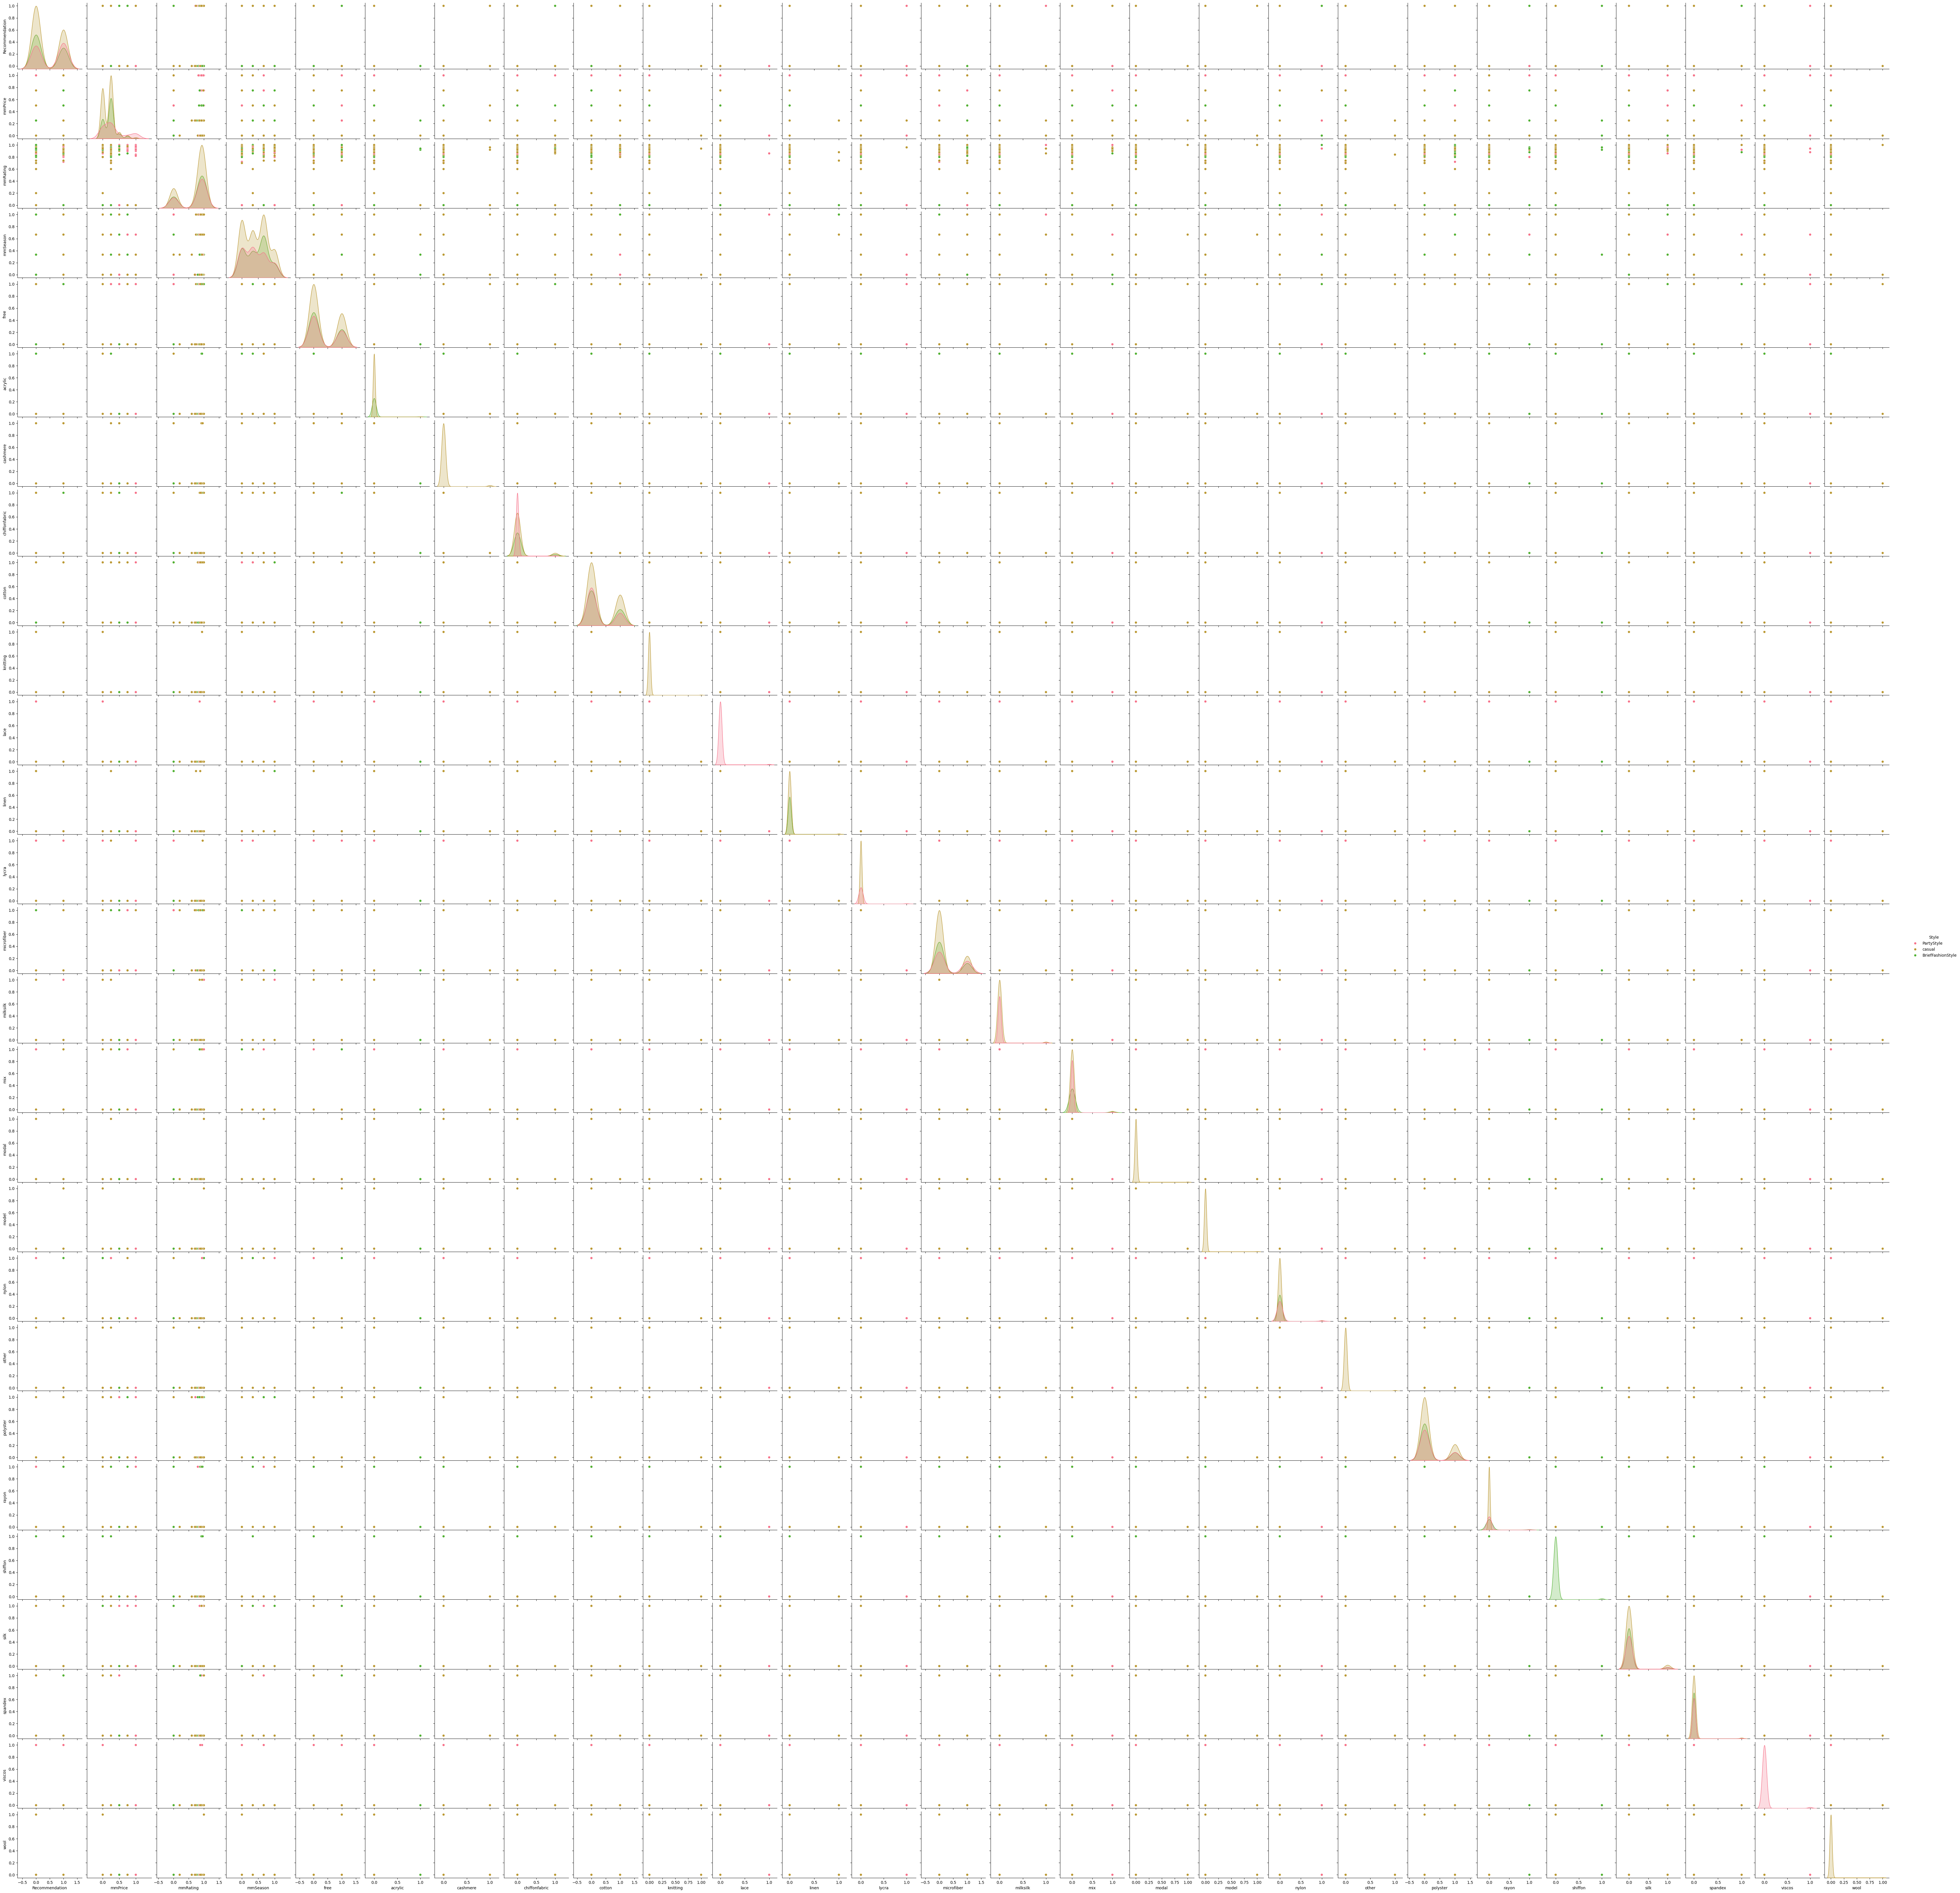

In [ ]:
sns.pairplot(dataset, kind="scatter", hue="Style");

Видим, что по признакам Casual отличается от остальных больше всего.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Style           500 non-null    object 
 1   Recommendation  500 non-null    int64  
 2   mmPrice         500 non-null    float64
 3   mmRating        500 non-null    float64
 4   mmSeason        500 non-null    float64
 5   free            500 non-null    float64
 6   acrylic         500 non-null    float64
 7   cashmere        500 non-null    float64
 8   chiffonfabric   500 non-null    float64
 9   cotton          500 non-null    float64
 10  knitting        500 non-null    float64
 11  lace            500 non-null    float64
 12  linen           500 non-null    float64
 13  lycra           500 non-null    float64
 14  microfiber      500 non-null    float64
 15  milksilk        500 non-null    float64
 16  mix             500 non-null    float64
 17  modal           500 non-null    flo

Сохранение в csv

In [ ]:
dataset.to_csv('Dresses2.csv')

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Style.

В X складывается весь набор данных без целевой переменной.


In [ ]:
X = dataset.drop(['Style'], axis=1)
y = dataset['Style']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (500, 27) | y shape: (500,) 


X имеет 500 строк и 27 столбцов, тогда как Y имеет 500 строк и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [ ]:
i=0
styleValues={}
for value in dataset['Style'].unique():
  styleValues[value]=i
  i+=1

In [ ]:
styleValues

{'PartyStyle': 0, 'casual': 1, 'BriefFashionStyle': 2}

In [ ]:
import scipy.stats as stats

y_mapped = y.map(styleValues)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=0.0, pvalue=1.0, df=498.0)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>
[Справочная информация по классификаторам](https://colab.research.google.com/drive/12aLAEAtM5a3dWh-6UYj18ONeCuH_lGJ3?usp=sharing)

In [ ]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000,random_state=1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=1)))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto',random_state=1)))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=12, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.495098 (0.044235)
LDA: 0.495172 (0.060862)
KNN: 0.394831 (0.064479)
CART: 0.364973 (0.049800)
NB: 0.277629 (0.031074)
SVC: 0.464944 (0.011433)


LinearDiscriminantAnalysis показал лучшую метрику среди всех алгоритмов.
Далее работаем с LinearDiscriminantAnalysis.

Обучим модель LDA на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Определяем нашу модель LDA
После этого подгоняем/обучаем модель на X_train и Y_train с помощью метода .fit().
Затем мы делаем прогноз на X_test с помощью метода .predict().

In [ ]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.47
sk LDA prediction: [2 1 1 2 1 2 1 1 1 2 2 1 1 0 1 0 1 1 1 1 1 1 1 1 2 2 0 1 1 2 2 1 2 1 1 1 2
 1 1 1 2 2 1 1 1 1 2 1 2 2 2 1 1 0 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 2 2 1 1 1
 2 2 1 1 1 0 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 2 1 2 1]
sk transformed features
[[ 7.49933820e+07  7.49933820e+07  7.49933820e+07  7.49933820e+07
   7.49933820e+07]
 [-2.01086191e+00 -5.33321117e-01 -1.02150359e+00 -1.97277123e+00
  -5.39090911e-01]]


## Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

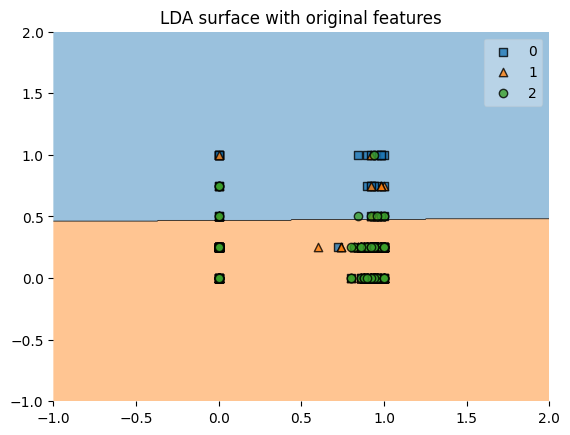

In [ ]:
from mlxtend.plotting import plot_decision_regions

# Создадим целевой вектор y_2d
# Преобразуем классы к классам 0, 1, 2 соответственно
y_s = y_train
X_2d= X_train[['mmRating',	'mmPrice']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

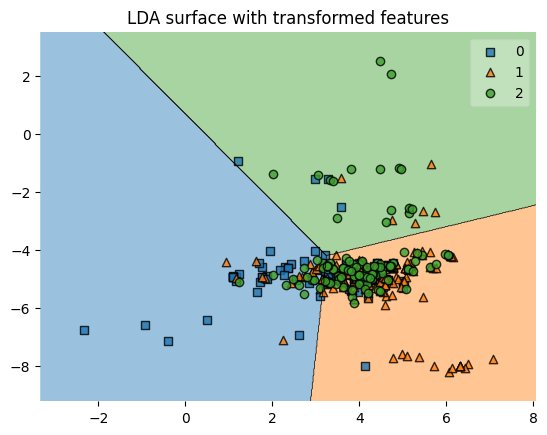

In [ ]:
df = dataset["Style"].map(styleValues)

Xs = dataset[['mmRating',	'mmPrice']]
ys = df.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [ ]:
predicted = sk_lda2.predict(X1_lda_test)


In [ ]:
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

## Accuray e AUC
'''
Теперь смотрим метрики.
НА ТЕСТОВОМ ДАТАСЕТЕ
'''
accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

'''
Получим результат
'''

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.53
Precision (confidence when predicting a 1): 0.5
Detail:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        33
           1       0.54      0.89      0.67        62
           2       0.40      0.07      0.11        30

    accuracy                           0.53       125
   macro avg       0.48      0.41      0.38       125
weighted avg       0.50      0.53      0.45       125



На линейном обучении, для выбранного датасета, результаты могут желать лучшего